In [1]:
# In this exercise we have to plot a graph representing comparision bwtween median salaries of data analyst, data scientist, data engineer 
# of top 6 job countries
# Load data from "lukebarousse/data_jobs" posted on huggingface

In [2]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = load_dataset("lukebarousse/data_jobs")
df_og = data["train"].to_pandas()

df_og.info()

c:\Users\tusha\anaconda3\envs\luke_python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating train split: 100%|██████████| 785741/785741 [00:15<00:00, 49524.43 examples/s]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [3]:
df = df_og.copy()

In [4]:
df_clean = df.dropna( subset = "salary_year_avg")

In [5]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22003 entries, 28 to 785692
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   job_title_short        22003 non-null  object 
 1   job_title              22003 non-null  object 
 2   job_location           21723 non-null  object 
 3   job_via                22003 non-null  object 
 4   job_schedule_type      21987 non-null  object 
 5   job_work_from_home     22003 non-null  bool   
 6   search_location        22003 non-null  object 
 7   job_posted_date        22003 non-null  object 
 8   job_no_degree_mention  22003 non-null  bool   
 9   job_health_insurance   22003 non-null  bool   
 10  job_country            22003 non-null  object 
 11  salary_rate            22003 non-null  object 
 12  salary_year_avg        22003 non-null  float64
 13  salary_hour_avg        0 non-null      float64
 14  company_name           22003 non-null  object 
 15  job_s

In [6]:
df_clean.duplicated().any()

True

In [7]:
df_clean = df_clean.drop_duplicates()

In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22002 entries, 28 to 785692
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   job_title_short        22002 non-null  object 
 1   job_title              22002 non-null  object 
 2   job_location           21722 non-null  object 
 3   job_via                22002 non-null  object 
 4   job_schedule_type      21986 non-null  object 
 5   job_work_from_home     22002 non-null  bool   
 6   search_location        22002 non-null  object 
 7   job_posted_date        22002 non-null  object 
 8   job_no_degree_mention  22002 non-null  bool   
 9   job_health_insurance   22002 non-null  bool   
 10  job_country            22002 non-null  object 
 11  salary_rate            22002 non-null  object 
 12  salary_year_avg        22002 non-null  float64
 13  salary_hour_avg        0 non-null      float64
 14  company_name           22002 non-null  object 
 15  job_s

In [9]:
df_clean = df_clean[(df["job_title_short"] == "Data Analyst") | (df["job_title_short"] == "Data Scientist") | (df["job_title_short"] == "Data Engineer")]

C:\Users\tusha\AppData\Local\Temp\ipykernel_5416\3295153579.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[(df["job_title_short"] == "Data Analyst") | (df["job_title_short"] == "Data Scientist") | (df["job_title_short"] == "Data Engineer")]


In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15872 entries, 28 to 785692
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   job_title_short        15872 non-null  object 
 1   job_title              15872 non-null  object 
 2   job_location           15671 non-null  object 
 3   job_via                15872 non-null  object 
 4   job_schedule_type      15860 non-null  object 
 5   job_work_from_home     15872 non-null  bool   
 6   search_location        15872 non-null  object 
 7   job_posted_date        15872 non-null  object 
 8   job_no_degree_mention  15872 non-null  bool   
 9   job_health_insurance   15872 non-null  bool   
 10  job_country            15872 non-null  object 
 11  salary_rate            15872 non-null  object 
 12  salary_year_avg        15872 non-null  float64
 13  salary_hour_avg        0 non-null      float64
 14  company_name           15872 non-null  object 
 15  job_s

In [11]:
top_countries = df_clean.job_country.value_counts().head(6).index

In [12]:
df_clean_pt = df_clean.pivot_table(index = "job_country", columns = "job_title_short", values = "salary_year_avg", aggfunc = "median")

In [13]:
sol_pt = df_clean_pt.loc[top_countries]
sol_pt

job_title_short,Data Analyst,Data Engineer,Data Scientist
job_country,,,
United States,90000.0,125000.0,130000.0
Sudan,87500.0,127500.0,130000.0
India,100500.0,147500.0,114008.0
Canada,98500.0,105000.0,122500.0
United Kingdom,87750.0,110000.0,105300.0
France,69175.0,98301.5,88128.0


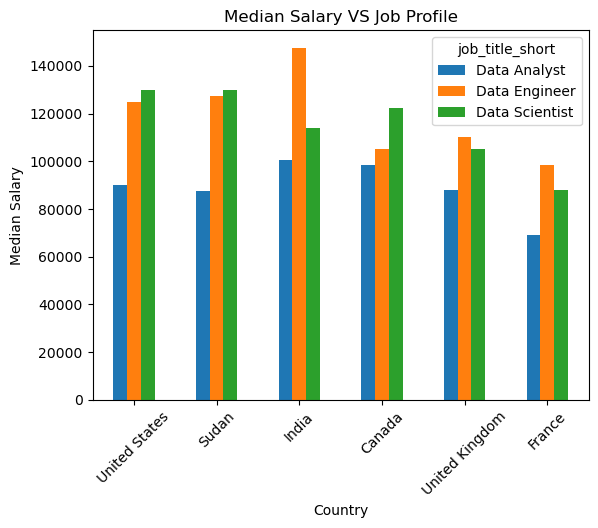

In [14]:
sol_pt.plot(kind = "bar")
plt.xlabel("Country")
plt.ylabel("Median Salary")
plt.title("Median Salary VS Job Profile")
plt.xticks(rotation = 45 , ha = "center")
plt.legend()
plt.show()